# Problem Statement

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

In [6]:
# Import Libraries / Datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [7]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [8]:
X_train.shape
# 50000 samples
# 3 channels (R,G,B)
# 32 x 32

(50000, 32, 32, 3)

In [9]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_test.shape

(10000, 1)

# Step 2: Visualize Data

[9]


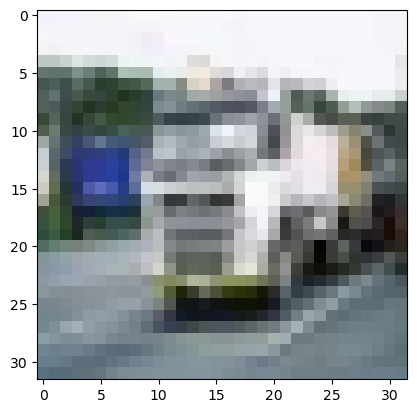

In [12]:
# Pick random number for input 
i = 1000

# X_train is the input
plt.imshow(X_train[i])

# y_train is the target class
print(y_train[i]) # 9 equals ships according to the class

/Users/yeji-park/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


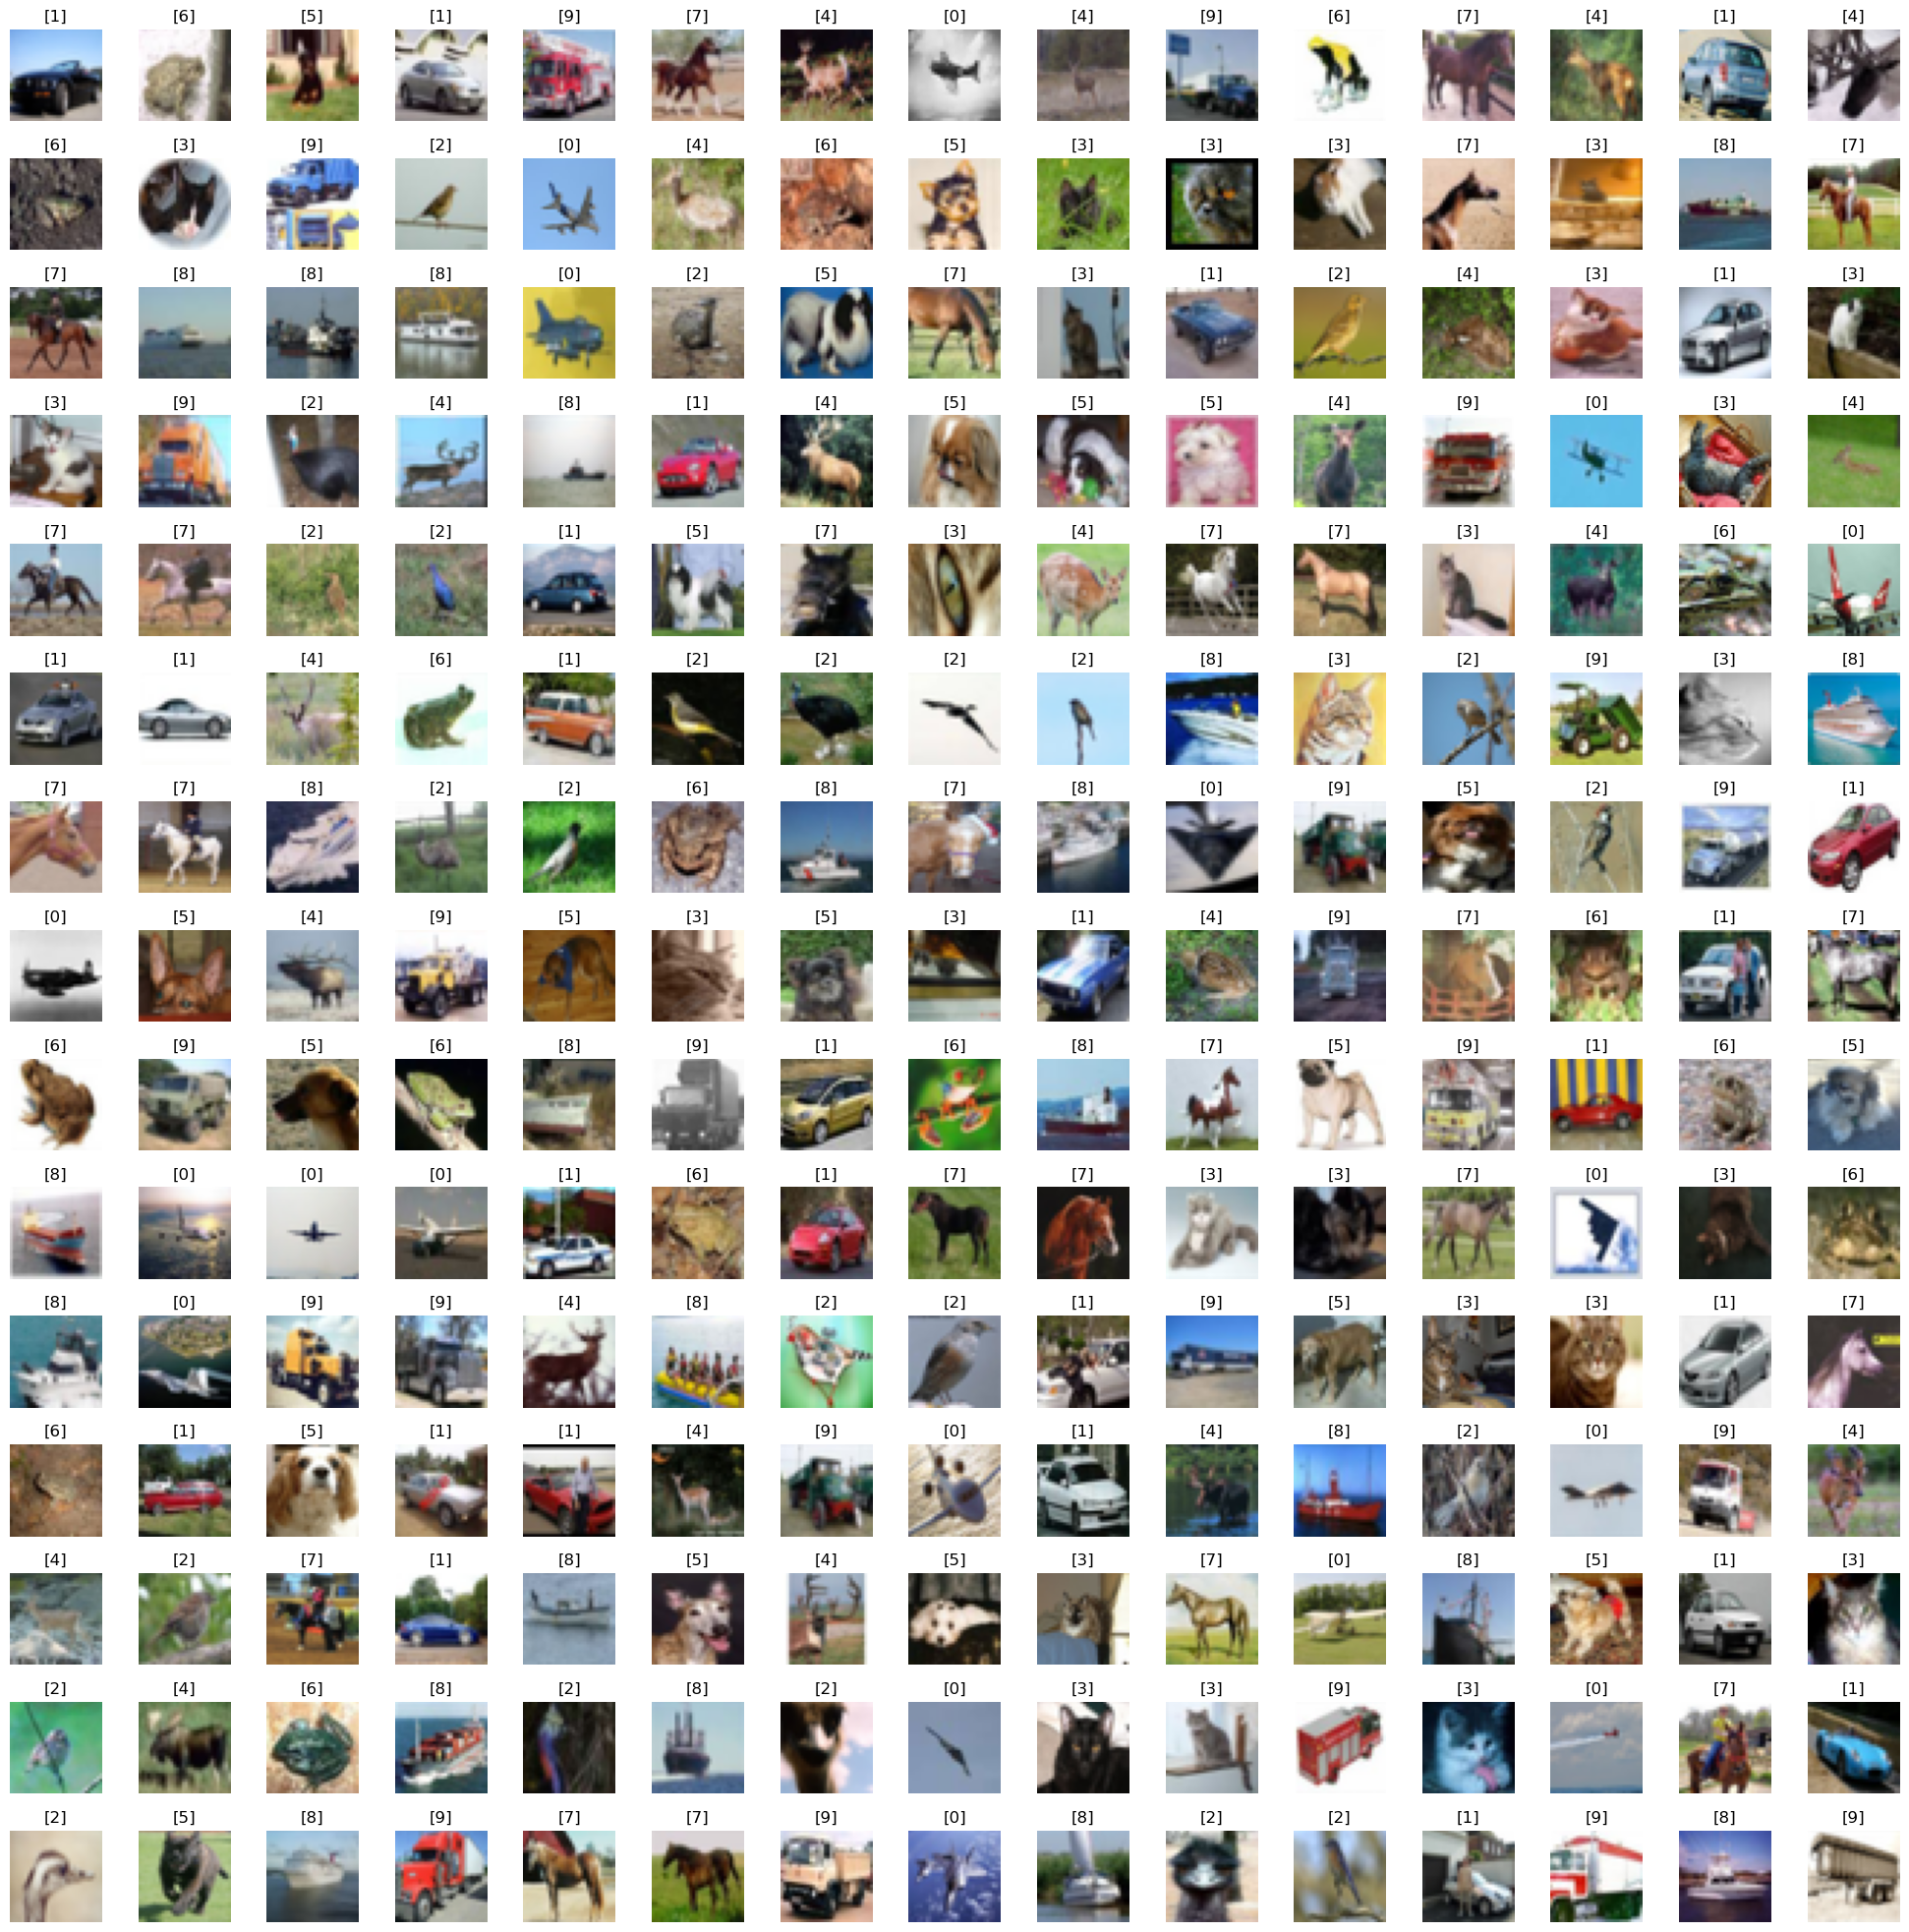

In [13]:
# Print matrix by creating grid
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (25,25))

# Ravel is used to flatten matrix
axes = axes.ravel()

# Get the length of the data
n_training = len(X_train) # until here the result returns empty grids

# Filling with images to each grid

# Step 1: Create array with consecutive numbers until l_grid & w_grid
for i in np.arange(0, l_grid * w_grid):
    index = np.random.randint(0,n_training) # Pick a random number
    axes[i].imshow(X_train[index]) # Plot the image within X_train data that has the index
    axes[i].set_title(y_train[index])
    axes[i].axis('off') # get rid of axis

plt.subplots_adjust(hspace = 0.4)

# Step 3: Data Preparation 

In [14]:
# For data augmentation and training, conver to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
# How many categories or classes?
num_cat = 10 

In [16]:
# Convert y_train from numbers to binary numbers 
import keras  
y_train = keras.utils.to_categorical(y_train, num_cat)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test = keras.utils.to_categorical(y_test, num_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [18]:
# Data Normalization for inputs having (0 to 255) into (0 to 1)
X_train = X_train/255
X_test = X_test/255
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
# Disregarding 50000 because we want to focus on 32 by 32, 3 only 
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

# Step 4: Train the Model

In [20]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [21]:
# Builiding Convolutional Neural Networks

# Building 2 layers Convolutional
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape)) # adding Convolutional layers 
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu')) # adding another Convolutional layers 

    # Adding MaxPooling layers
cnn_model.add(MaxPooling2D(2,2))
    # Add dropouts
cnn_model.add(Dropout(0.3))

    # Adding 2 layers Convolutional more 
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')) # adding Convolutional layers 
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu')) # adding another Convolutional layers 
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

# Flattening Phase
cnn_model.add(Flatten())

    # Add fully connected networks
cnn_model.add(Dense(units = 512, activation = 'relu'))

    # Adding another hidden layer
cnn_model.add(Dense(units = 512, activation = 'relu'))

# Building the last layer -> output layer
cnn_model.add(Dense(units = 10, activation = 'softmax')) 
    # We are using classifciation, objective is to have 10 classes thus, units = 10
    # softmax is mainly used for output (0,1)
    # relu is for regression and continuous output

In [30]:
# Compile the Method 
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [31]:
# Fit training data to the model
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True) 

# history = object capturing all the progression
# batch_size = how many images will be fed at once? 

Epoch 1/2
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6000 - accuracy: 0.4179
Epoch 2/2
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1439 - accuracy: 0.5967


# Step 5: Evaluate the Model 

In [33]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 4s 11ms/step - loss: 1.0397 - accuracy: 0.6407
Test Accuracy: 0.6406999826431274


In [37]:
# Take my train model, feed my X_test and predict the class

predicted_class = np.argmax(cnn_model.predict(X_test), axis=1)
predicted_class

313/313 [==============================] - 2s 6ms/step


array([3, 8, 0, ..., 5, 1, 7])

In [42]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

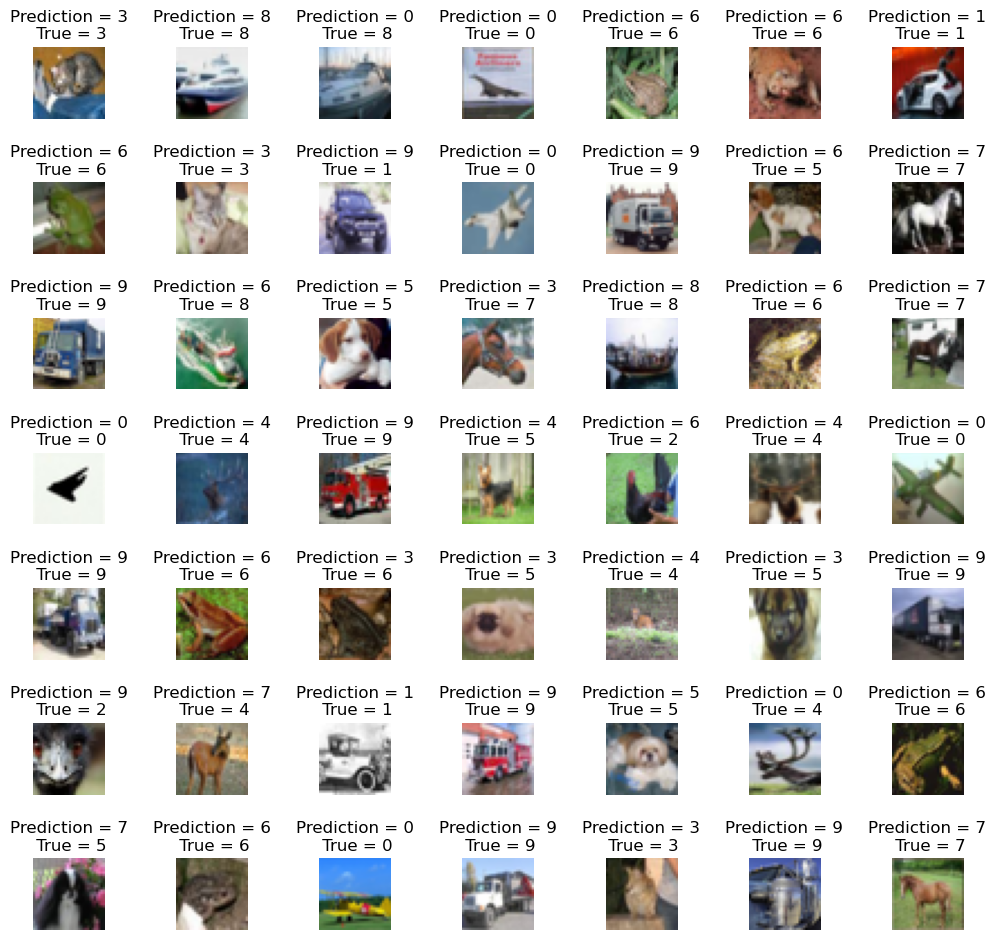

In [46]:
l = 7 
w = 7
fig,axes = plt.subplots(l,w,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, l*w):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_class[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

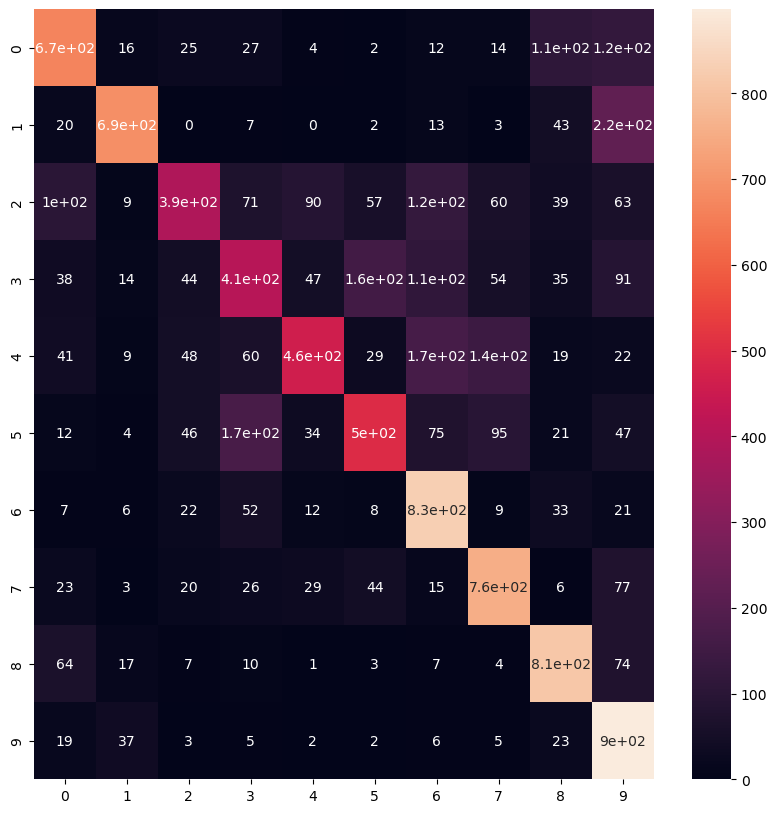

In [49]:
# Confusion Matrix for Summary
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_class)
cm

plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

# Step 6: Saving the Model 

In [1]:
import os 
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
    
model_path = os.path.join(directory, 'keras_cifar10_trained_model.keras')
cnn_model.save(model_path)

NameError: name 'cnn_model' is not defined

# Step 7: Data Augmentation for the CIFAR-10 Dataset

In [52]:
import keras 
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [53]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [57]:
n = 8
X_train_sample = X_train[:n]
X_train_sample.shape

(8, 32, 32, 3)

In [58]:
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(rotation_range = 90) # parameter: what I want to do with my images
datagen_train.fit(X_train_sample)

In [66]:
from PIL import Image
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in datagen_train.flow(X_train_sample, batch_size = n): 
#get my train sample and generate flow of batches 
    for i in range(0,n):
        ax = fig.add_subplot(1, n ,i+1) # 1 row with 8 images
        ax.imshow(toimage(x_batch[i]))
    fig.suptitle('Augmented Images(rotated 90 degrees)')
    plt.show()
    break;

ImportError: cannot import name 'toimage' from 'scipy.misc' (/Users/yeji-park/anaconda3/lib/python3.11/site-packages/scipy/misc/__init__.py)

# Step 7.2: MODEL TRAINING USING AUGEMENTED DATASET

In [67]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [68]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2


/var/folders/65/q8nnpp8j1slf_vfjb6j_nrkr0000gn/T/ipykernel_1474/25322486.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)


1563/1563 [==============================] - 74s 47ms/step - loss: 139116395899125760.0000 - accuracy: 7.2000e-04
Epoch 2/2
1275/1563 [=======================>......] - ETA: 14s - loss: 7056094980531552256.0000 - accuracy: 0.0000e+00

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)